In [95]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/life-expectancy-and-socio-economic-world-bank/life expectancy.csv


In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [97]:
df=pd.read_csv("/kaggle/input/life-expectancy-and-socio-economic-world-bank/life expectancy.csv")
df.head(2)

,Country Name,Country Code,Region,IncomeGroup,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
0,Afghanistan,AFG,South Asia,Low income,2001,56.308,47.8,730.0,NaN,NaN,10.809,NaN,NaN,2179727.10,9689193.70,5795426.38
1,Angola,AGO,Sub-Saharan Africa,Lower middle income,2001,47.059,67.5,15960.0,4.483516,NaN,4.004,NaN,NaN,1392080.71,11190210.53,2663516.34


In [98]:
df.head()

,Country Name,Country Code,Region,IncomeGroup,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
0,Afghanistan,AFG,South Asia,Low income,2001,56.308,47.8,730.0,NaN,NaN,10.809000,NaN,NaN,2179727.10,9689193.70,5795426.38
1,Angola,AGO,Sub-Saharan Africa,Lower middle income,2001,47.059,67.5,15960.0,4.483516,NaN,4.004000,NaN,NaN,1392080.71,11190210.53,2663516.34
2,Albania,ALB,Europe & Central Asia,Upper middle income,2001,74.288,4.9,3230.0,7.139524,3.4587,18.575001,NaN,40.520895,117081.67,140894.78,532324.75
3,Andorra,AND,Europe & Central Asia,High income,2001,NaN,NaN,520.0,5.865939,NaN,NaN,NaN,21.788660,1697.99,695.56,13636.64
4,United Arab Emirates,ARE,Middle East & North Africa,High income,2001,74.544,2.8,97200.0,2.484370,NaN,2.493000,NaN,NaN,144678.14,65271.91,481740.70


In [99]:
df.shape

(3306, 16)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3306 entries, 0 to 3305
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country Name                    3306 non-null   object 
 1   Country Code                    3306 non-null   object 
 2   Region                          3306 non-null   object 
 3   IncomeGroup                     3306 non-null   object 
 4   Year                            3306 non-null   int64  
 5   Life Expectancy World Bank      3118 non-null   float64
 6   Prevelance of Undernourishment  2622 non-null   float64
 7   CO2                             3154 non-null   float64
 8   Health Expenditure %            3126 non-null   float64
 9   Education Expenditure %         2216 non-null   float64
 10  Unemployment                    3002 non-null   float64
 11  Corruption                      975 non-null    float64
 12  Sanitation                      20

In [101]:
df.duplicated().value_counts()

False    3306
Name: count, dtype: int64

In [102]:
df=df.drop_duplicates()

In [103]:
df.shape

(3306, 16)

In [104]:
df.describe()

,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
count,3306.000000,3118.000000,2622.000000,3.154000e+03,3126.000000,2216.000000,3002.000000,975.000000,2059.000000,3.306000e+03,3.306000e+03,3.306000e+03
mean,2010.000000,69.748362,10.663654,1.574924e+05,6.364059,4.589014,7.890760,2.860513,52.738785,1.318219e+06,4.686289e+06,7.392488e+06
std,5.478054,9.408154,11.285897,7.726415e+05,2.842844,2.119165,6.270832,0.621343,30.126762,5.214068e+06,1.843727e+07,2.932688e+07
min,2001.000000,40.369000,2.500000,1.000000e+01,1.263576,0.850320,0.100000,1.000000,2.377647,4.304900e+02,3.301600e+02,2.481820e+03
25%,2005.000000,63.642000,2.500000,2.002500e+03,4.205443,3.136118,3.733000,2.500000,24.746007,6.245688e+04,5.776475e+04,3.184758e+05
50%,2010.000000,72.168500,6.200000,1.020500e+04,5.892352,4.371465,5.920000,3.000000,49.317481,2.456910e+05,3.147693e+05,1.350146e+06
75%,2015.000000,76.809000,14.775000,5.877250e+04,8.119166,5.519825,10.097500,3.250000,80.278847,8.465591e+05,2.831636e+06,3.918468e+06
max,2019.000000,84.356341,70.900000,1.070722e+07,24.230680,23.270000,37.250000,4.500000,100.000004,5.563676e+07,2.685646e+08,3.246378e+08


In [105]:
df.isnull().sum()

Country Name                         0
Country Code                         0
Region                               0
IncomeGroup                          0
Year                                 0
Life Expectancy World Bank         188
Prevelance of Undernourishment     684
CO2                                152
Health Expenditure %               180
Education Expenditure %           1090
Unemployment                       304
Corruption                        2331
Sanitation                        1247
Injuries                             0
Communicable                         0
NonCommunicable                      0
dtype: int64

In [106]:
df.isnull().sum()/len(df)*100

Country Name                       0.000000
Country Code                       0.000000
Region                             0.000000
IncomeGroup                        0.000000
Year                               0.000000
Life Expectancy World Bank         5.686630
Prevelance of Undernourishment    20.689655
CO2                                4.597701
Health Expenditure %               5.444646
Education Expenditure %           32.970357
Unemployment                       9.195402
Corruption                        70.508167
Sanitation                        37.719298
Injuries                           0.000000
Communicable                       0.000000
NonCommunicable                    0.000000
dtype: float64

In [107]:
df.describe()

,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
count,3306.000000,3118.000000,2622.000000,3.154000e+03,3126.000000,2216.000000,3002.000000,975.000000,2059.000000,3.306000e+03,3.306000e+03,3.306000e+03
mean,2010.000000,69.748362,10.663654,1.574924e+05,6.364059,4.589014,7.890760,2.860513,52.738785,1.318219e+06,4.686289e+06,7.392488e+06
std,5.478054,9.408154,11.285897,7.726415e+05,2.842844,2.119165,6.270832,0.621343,30.126762,5.214068e+06,1.843727e+07,2.932688e+07
min,2001.000000,40.369000,2.500000,1.000000e+01,1.263576,0.850320,0.100000,1.000000,2.377647,4.304900e+02,3.301600e+02,2.481820e+03
25%,2005.000000,63.642000,2.500000,2.002500e+03,4.205443,3.136118,3.733000,2.500000,24.746007,6.245688e+04,5.776475e+04,3.184758e+05
50%,2010.000000,72.168500,6.200000,1.020500e+04,5.892352,4.371465,5.920000,3.000000,49.317481,2.456910e+05,3.147693e+05,1.350146e+06
75%,2015.000000,76.809000,14.775000,5.877250e+04,8.119166,5.519825,10.097500,3.250000,80.278847,8.465591e+05,2.831636e+06,3.918468e+06
max,2019.000000,84.356341,70.900000,1.070722e+07,24.230680,23.270000,37.250000,4.500000,100.000004,5.563676e+07,2.685646e+08,3.246378e+08


# **Data Cleaning**

In [108]:

nc = ["Life Expectancy World Bank", "Prevelance of Undernourishment", "CO2", "Health Expenditure %", "Education Expenditure %",
      "Unemployment", "Corruption", "Sanitation", "Injuries", "Communicable", "NonCommunicable"]

for c in nc:
    df[c].fillna(df[c].median(), inplace=True)

df.isnull().sum()

Country Name                      0
Country Code                      0
Region                            0
IncomeGroup                       0
Year                              0
Life Expectancy World Bank        0
Prevelance of Undernourishment    0
CO2                               0
Health Expenditure %              0
Education Expenditure %           0
Unemployment                      0
Corruption                        0
Sanitation                        0
Injuries                          0
Communicable                      0
NonCommunicable                   0
dtype: int64

# 2.Look at the value counts of columns that have object datatype and detect strange values apart from the NaN Values.

In [109]:
df.columns

Index(['Country Name', 'Country Code', 'Region', 'IncomeGroup', 'Year',
       'Life Expectancy World Bank', 'Prevelance of Undernourishment', 'CO2',
       'Health Expenditure %', 'Education Expenditure %', 'Unemployment',
       'Corruption', 'Sanitation', 'Injuries', 'Communicable',
       'NonCommunicable'],
      dtype='object')

In [110]:
df.describe(include="object")

,Country Name,Country Code,Region,IncomeGroup
count,3306,3306,3306,3306
unique,174,174,7,4
top,Afghanistan,AFG,Europe & Central Asia,High income
freq,19,19,893,1083


In [111]:
df.columns.dtype

dtype('O')

# rename objects as object_col

In [112]:
object_col=df.loc[:, df.dtypes == "object"].columns
object_col

Index(['Country Name', 'Country Code', 'Region', 'IncomeGroup'], dtype='object')

In [113]:
for col in object_col:
    print(col)
    print("--"*8)
    print(df[col].value_counts(dropna=False))
    print("--"*20)

Country Name
----------------
Country Name
Afghanistan          19
Nepal                19
Malawi               19
Malaysia             19
Namibia              19
                     ..
Guinea-Bissau        19
Equatorial Guinea    19
Greece               19
Grenada              19
Zimbabwe             19
Name: count, Length: 174, dtype: int64
----------------------------------------
Country Code
----------------
Country Code
AFG    19
NPL    19
MWI    19
MYS    19
NAM    19
       ..
GNB    19
GNQ    19
GRC    19
GRD    19
ZWE    19
Name: count, Length: 174, dtype: int64
----------------------------------------
Region
----------------
Region
Europe & Central Asia         893
Sub-Saharan Africa            836
Latin America & Caribbean     551
East Asia & Pacific           513
Middle East & North Africa    304
South Asia                    152
North America                  57
Name: count, dtype: int64
----------------------------------------
IncomeGroup
----------------
IncomeGroup
Hig

In [114]:
df

,Country Name,Country Code,Region,IncomeGroup,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
0,Afghanistan,AFG,South Asia,Low income,2001,56.3080,47.8,730.000000,5.892352,4.371465,10.809000,3.0,49.317481,2179727.10,9689193.70,5795426.38
1,Angola,AGO,Sub-Saharan Africa,Lower middle income,2001,47.0590,67.5,15960.000000,4.483516,4.371465,4.004000,3.0,49.317481,1392080.71,11190210.53,2663516.34
2,Albania,ALB,Europe & Central Asia,Upper middle income,2001,74.2880,4.9,3230.000000,7.139524,3.458700,18.575001,3.0,40.520895,117081.67,140894.78,532324.75
3,Andorra,AND,Europe & Central Asia,High income,2001,72.1685,6.2,520.000000,5.865939,4.371465,5.920000,3.0,21.788660,1697.99,695.56,13636.64
4,United Arab Emirates,ARE,Middle East & North Africa,High income,2001,74.5440,2.8,97200.000000,2.484370,4.371465,2.493000,3.0,49.317481,144678.14,65271.91,481740.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3301,Vanuatu,VUT,East Asia & Pacific,Lower middle income,2019,70.4740,12.4,209.999993,3.360347,1.777880,1.801000,3.0,49.317481,12484.18,26032.56,69213.56
3302,Samoa,WSM,East Asia & Pacific,Lower middle income,2019,73.3210,4.4,300.000012,6.363094,4.706250,8.406000,4.0,47.698788,6652.84,9095.19,43798.62
3303,South Africa,ZAF,Sub-Saharan Africa,Upper middle income,2019,64.1310,6.3,439640.014648,9.109355,5.917710,28.469999,3.0,49.317481,3174676.10,13198944.71,10214261.89
3304,Zambia,ZMB,Sub-Saharan Africa,Low income,2019,63.8860,6.2,6800.000191,5.312203,4.465180,12.520000,2.5,49.317481,510982.75,4837094.00,2649687.82


In [115]:
df.fillna(0)

,Country Name,Country Code,Region,IncomeGroup,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
0,Afghanistan,AFG,South Asia,Low income,2001,56.3080,47.8,730.000000,5.892352,4.371465,10.809000,3.0,49.317481,2179727.10,9689193.70,5795426.38
1,Angola,AGO,Sub-Saharan Africa,Lower middle income,2001,47.0590,67.5,15960.000000,4.483516,4.371465,4.004000,3.0,49.317481,1392080.71,11190210.53,2663516.34
2,Albania,ALB,Europe & Central Asia,Upper middle income,2001,74.2880,4.9,3230.000000,7.139524,3.458700,18.575001,3.0,40.520895,117081.67,140894.78,532324.75
3,Andorra,AND,Europe & Central Asia,High income,2001,72.1685,6.2,520.000000,5.865939,4.371465,5.920000,3.0,21.788660,1697.99,695.56,13636.64
4,United Arab Emirates,ARE,Middle East & North Africa,High income,2001,74.5440,2.8,97200.000000,2.484370,4.371465,2.493000,3.0,49.317481,144678.14,65271.91,481740.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3301,Vanuatu,VUT,East Asia & Pacific,Lower middle income,2019,70.4740,12.4,209.999993,3.360347,1.777880,1.801000,3.0,49.317481,12484.18,26032.56,69213.56
3302,Samoa,WSM,East Asia & Pacific,Lower middle income,2019,73.3210,4.4,300.000012,6.363094,4.706250,8.406000,4.0,47.698788,6652.84,9095.19,43798.62
3303,South Africa,ZAF,Sub-Saharan Africa,Upper middle income,2019,64.1310,6.3,439640.014648,9.109355,5.917710,28.469999,3.0,49.317481,3174676.10,13198944.71,10214261.89
3304,Zambia,ZMB,Sub-Saharan Africa,Low income,2019,63.8860,6.2,6800.000191,5.312203,4.465180,12.520000,2.5,49.317481,510982.75,4837094.00,2649687.82


In [116]:
df.isnull().sum()

Country Name                      0
Country Code                      0
Region                            0
IncomeGroup                       0
Year                              0
Life Expectancy World Bank        0
Prevelance of Undernourishment    0
CO2                               0
Health Expenditure %              0
Education Expenditure %           0
Unemployment                      0
Corruption                        0
Sanitation                        0
Injuries                          0
Communicable                      0
NonCommunicable                   0
dtype: int64

In [117]:
df

,Country Name,Country Code,Region,IncomeGroup,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
0,Afghanistan,AFG,South Asia,Low income,2001,56.3080,47.8,730.000000,5.892352,4.371465,10.809000,3.0,49.317481,2179727.10,9689193.70,5795426.38
1,Angola,AGO,Sub-Saharan Africa,Lower middle income,2001,47.0590,67.5,15960.000000,4.483516,4.371465,4.004000,3.0,49.317481,1392080.71,11190210.53,2663516.34
2,Albania,ALB,Europe & Central Asia,Upper middle income,2001,74.2880,4.9,3230.000000,7.139524,3.458700,18.575001,3.0,40.520895,117081.67,140894.78,532324.75
3,Andorra,AND,Europe & Central Asia,High income,2001,72.1685,6.2,520.000000,5.865939,4.371465,5.920000,3.0,21.788660,1697.99,695.56,13636.64
4,United Arab Emirates,ARE,Middle East & North Africa,High income,2001,74.5440,2.8,97200.000000,2.484370,4.371465,2.493000,3.0,49.317481,144678.14,65271.91,481740.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3301,Vanuatu,VUT,East Asia & Pacific,Lower middle income,2019,70.4740,12.4,209.999993,3.360347,1.777880,1.801000,3.0,49.317481,12484.18,26032.56,69213.56
3302,Samoa,WSM,East Asia & Pacific,Lower middle income,2019,73.3210,4.4,300.000012,6.363094,4.706250,8.406000,4.0,47.698788,6652.84,9095.19,43798.62
3303,South Africa,ZAF,Sub-Saharan Africa,Upper middle income,2019,64.1310,6.3,439640.014648,9.109355,5.917710,28.469999,3.0,49.317481,3174676.10,13198944.71,10214261.89
3304,Zambia,ZMB,Sub-Saharan Africa,Low income,2019,63.8860,6.2,6800.000191,5.312203,4.465180,12.520000,2.5,49.317481,510982.75,4837094.00,2649687.82


In [118]:
print((df.astype(str) == '?').any())

Country Name                      False
Country Code                      False
Region                            False
IncomeGroup                       False
Year                              False
Life Expectancy World Bank        False
Prevelance of Undernourishment    False
CO2                               False
Health Expenditure %              False
Education Expenditure %           False
Unemployment                      False
Corruption                        False
Sanitation                        False
Injuries                          False
Communicable                      False
NonCommunicable                   False
dtype: bool


In [119]:
original_list = ['Country Name', 'Country Code', 'Region', 'IncomeGroup', 'Year',
                 'Life Expectancy World Bank', 'Prevalence of Undernourishment', 'CO2',
                 'Health Expenditure %', 'Education Expenditure %', 'Unemployment',
                 'Corruption', 'Sanitation', 'Injuries', 'Communicable', 'NonCommunicable']

df.columns = df.columns.str.replace(' ', '_')

# Print the DataFrame with underscores in column names
print(df)


              Country_Name Country_Code                      Region  \
0              Afghanistan          AFG                  South Asia   
1                   Angola          AGO          Sub-Saharan Africa   
2                  Albania          ALB       Europe & Central Asia   
3                  Andorra          AND       Europe & Central Asia   
4     United Arab Emirates          ARE  Middle East & North Africa   
...                    ...          ...                         ...   
3301               Vanuatu          VUT         East Asia & Pacific   
3302                 Samoa          WSM         East Asia & Pacific   
3303          South Africa          ZAF          Sub-Saharan Africa   
3304                Zambia          ZMB          Sub-Saharan Africa   
3305              Zimbabwe          ZWE          Sub-Saharan Africa   

              IncomeGroup  Year  Life_Expectancy_World_Bank  \
0              Low income  2001                     56.3080   
1     Lower middle in

In [120]:
df.columns


Index(['Country_Name', 'Country_Code', 'Region', 'IncomeGroup', 'Year',
       'Life_Expectancy_World_Bank', 'Prevelance_of_Undernourishment', 'CO2',
       'Health_Expenditure_%', 'Education_Expenditure_%', 'Unemployment',
       'Corruption', 'Sanitation', 'Injuries', 'Communicable',
       'NonCommunicable'],
      dtype='object')

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3306 entries, 0 to 3305
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country_Name                    3306 non-null   object 
 1   Country_Code                    3306 non-null   object 
 2   Region                          3306 non-null   object 
 3   IncomeGroup                     3306 non-null   object 
 4   Year                            3306 non-null   int64  
 5   Life_Expectancy_World_Bank      3306 non-null   float64
 6   Prevelance_of_Undernourishment  3306 non-null   float64
 7   CO2                             3306 non-null   float64
 8   Health_Expenditure_%            3306 non-null   float64
 9   Education_Expenditure_%         3306 non-null   float64
 10  Unemployment                    3306 non-null   float64
 11  Corruption                      3306 non-null   float64
 12  Sanitation                      33

In [122]:
from plotly.express import choropleth
choropleth(data_frame=df[df['Year'] == 2019], locations='Country_Code', color='Region')

# we are missing some countries in the dataset


/tmp/ipykernel_32/1204558131.py:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




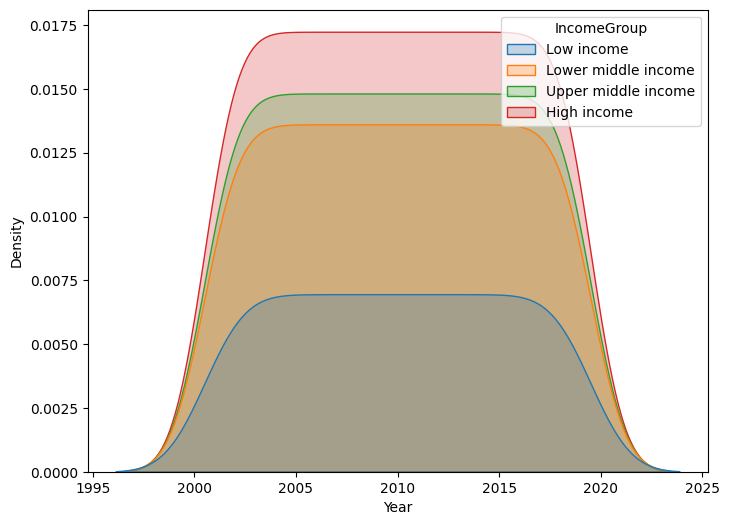

In [123]:
plt.figure(figsize=(8,6))

sns.kdeplot(x="Year",data=df,hue="IncomeGroup",shade=True);

In [124]:
df.columns[6:]

Index(['Prevelance_of_Undernourishment', 'CO2', 'Health_Expenditure_%',
       'Education_Expenditure_%', 'Unemployment', 'Corruption', 'Sanitation',
       'Injuries', 'Communicable', 'NonCommunicable'],
      dtype='object')

In [125]:
import numpy as np
import plotly.express as px


fig = px.scatter_geo(df, locations="Country_Code",color="Life_Expectancy_World_Bank",
                     size="Prevelance_of_Undernourishment",title="Worldwide Life Expectancy vs. Prevalence of Undernourishment by Country") 
                     
fig.show()

corr_Prevelance_of_Undernourishment=df['Prevelance_of_Undernourishment'].corr(df['Life_Expectancy_World_Bank'])
print(f"Correlation between Prevelance of Undernourishment and Life Expectancy:{corr_Prevelance_of_Undernourishment:.2f}")



Correlation between Prevelance of Undernourishment and Life Expectancy:-0.59


In [126]:
import plotly.express as px

fig = px.scatter_geo(df, locations="Country_Code",color="Life_Expectancy_World_Bank",
                     size="Health_Expenditure_%",
    title="World Health Analysis: Life Expectancy vs. Health Expenditure by Country")
fig.show()


In [127]:

import plotly.express as px

fig = px.scatter_geo(df, locations="Country_Code",color="Life_Expectancy_World_Bank",
                     size="Education_Expenditure_%",
    title="Relationship between Education Expenditure and Life Expectancy by Country")
fig.show()


In [128]:
correlation_health = df['Health_Expenditure_%'].corr(df['Life_Expectancy_World_Bank'])
correlation_education = df['Education_Expenditure_%'].corr(df['Life_Expectancy_World_Bank'])

print(f"Correlation between Health Expenditure and Life Expectancy: {correlation_health:.2f}")
print(f"Correlation between Education Expenditure and Life Expectancy: {correlation_education:.2f}")


Correlation between Health Expenditure and Life Expectancy: 0.29
Correlation between Education Expenditure and Life Expectancy: 0.15


In [129]:
fig = px.scatter_geo(df, 
    locations="Country_Code", 
    color="Prevelance_of_Undernourishment",
    size="Unemployment",
    title="Global Prevalence of Undernourishment vs. Unemployment Rate")
fig.show()
corr_unemployment= np.corrcoef(df['Unemployment'],df['Prevelance_of_Undernourishment'])[0,1]
print(f"Correlation between Unemployment and Life Expectancy: {corr_unemployment:.2f}")


Correlation between Unemployment and Life Expectancy: -0.01


In [130]:
fig = px.scatter_geo(
    df, 
    locations="Country_Code", 
    color="Life_Expectancy_World_Bank",
    size="Corruption",
    title="Corruption(CPIA rating)"
)
fig.show()
corr_unemployment= df['Corruption'].corr(df['Life_Expectancy_World_Bank'])
print(f"Correlation between Corruption and Life Expectancy: {corr_unemployment:.2f}")


Correlation between Corruption and Life Expectancy: 0.21


In [145]:
fig = px.scatter_geo(
    df, 
    locations="Country_Code", 
    color="CO2",
    size="Sanitation",
    title="Sanitation"
)
fig.show()

correlation_sanitation = df['Sanitation'].corr(df['CO2'])

print(f"Correlation between Corruption and Life Expectancy: {correlation_sanitation:.2f}")

Correlation between Corruption and Life Expectancy: 0.10


In [154]:
fig = px.scatter_geo(
    df, 
    locations="Country_Code", 
    color="Health_Expenditure_%",
    size="Injuries",
    title="Injuries"
)
fig.show()
corr_injuries = df['Injuries'].corr(df['Health_Expenditure_%'])

print(f"Correlation between Corruption and Life Expectancy: {corr_injuries:.2f}")

Correlation between Corruption and Life Expectancy: -0.08
